In [1]:
!pip -q install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py

In [3]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [19]:
data = load_boston()

In [20]:
X = data.data
y = data.target

In [21]:
X.shape

(506, 13)

In [22]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [25]:
df['PRICE'] = data.target

In [26]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

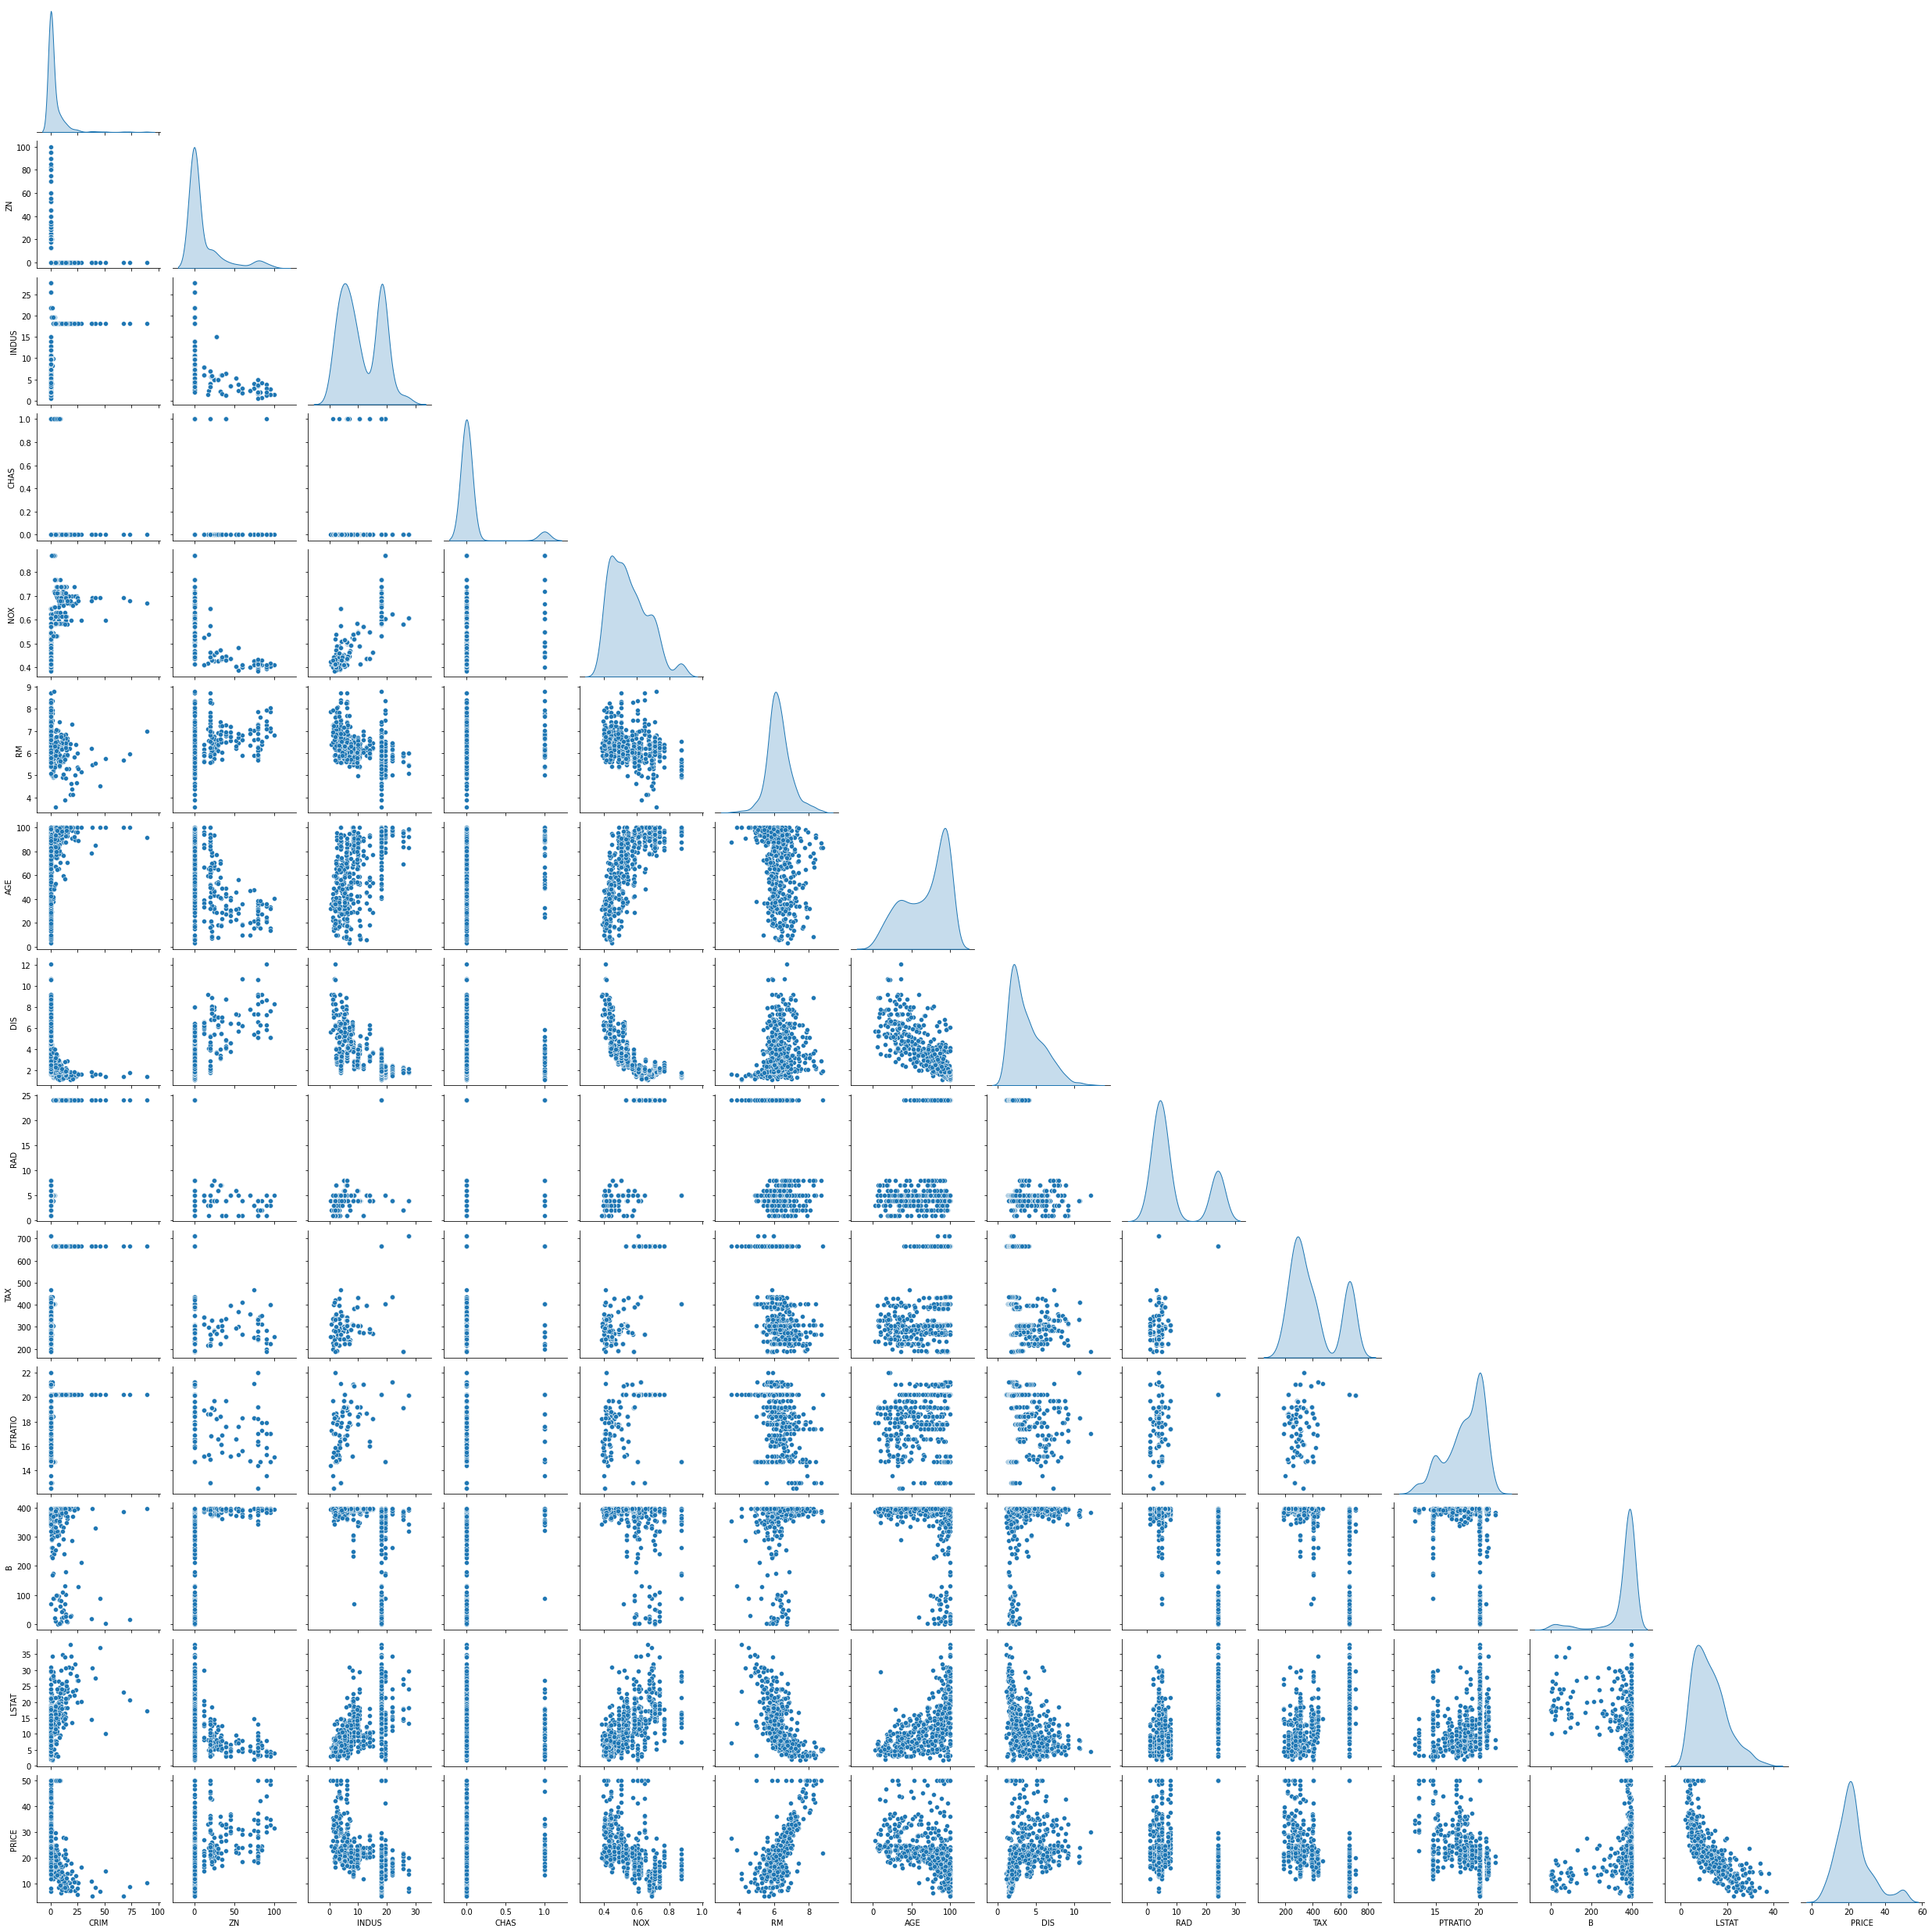

In [12]:
sns.pairplot(df, corner=True, diag_kind='kde')

<AxesSubplot:>

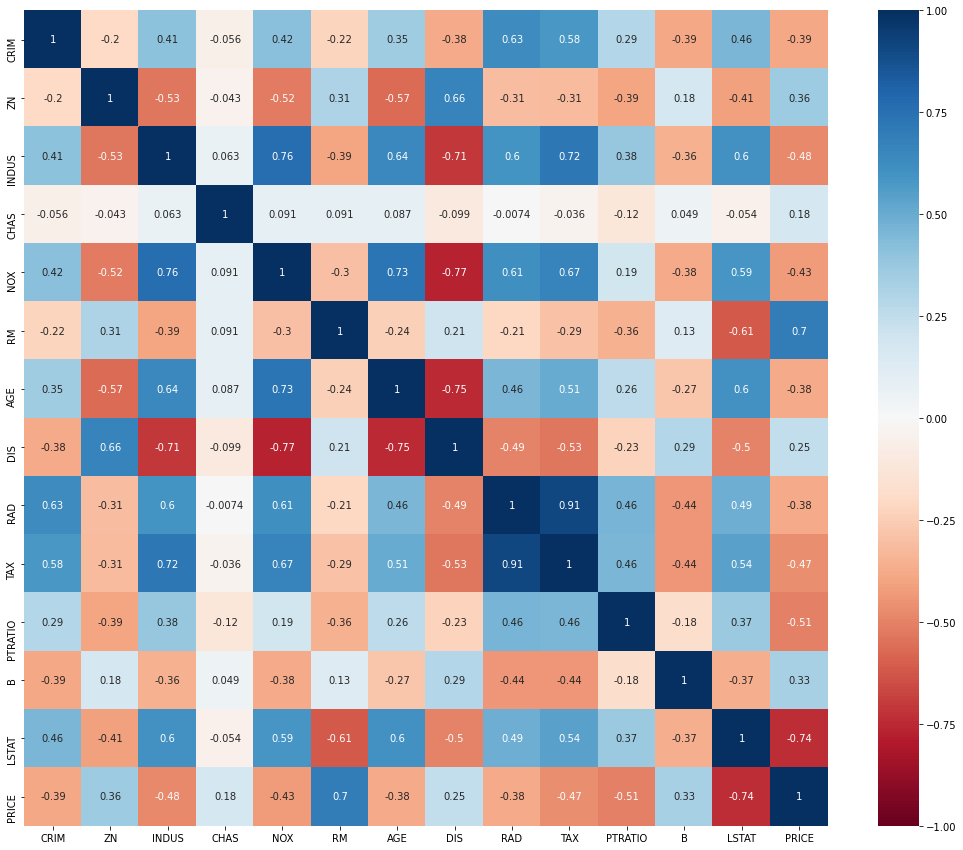

In [13]:
f, ax = plt.subplots(figsize=(18,15))
sns.heatmap(df.corr(), cmap='RdBu', ax=ax, vmin=-1, vmax=1, annot=True, fmt='0.2g')

#设置坐标字体方向
# label_y = ax.get_yticklabels()
# plt.setp(label_y, rotation=45, horizontalalignment='right')
# label_x = ax.get_xticklabels()
# plt.setp(label_x, rotation=45, horizontalalignment='right')

#设置坐标名称
# plt.xlabel('x.num')
# plt.ylabel('y.num')
# plt.title('Plotting')#标题
# plt.show()

In [14]:
X = data.data
y = data.target

In [15]:
# Split the data into training/testing sets
X_train = X[:-100]
X_test = X[-100:]

# Split the targets into training/testing sets
y_train = y[:-100]
y_test = y[-100:]

In [27]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
print('Coefficients')
print()
for name, coef in zip(data.feature_names, regr.coef_):
    print('{:>7s}'.format(name), '%.3f'%coef)

print()
# The mean squared error
print('MSE Train: %.2f' % mean_squared_error(y_train, regr.predict(X_train)))
print('MSE Test:  %.2f' % mean_squared_error(y_test, y_pred))

# Plot outputs
"""
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
""";

Coefficients

   CRIM -0.191
     ZN 0.044
  INDUS 0.052
   CHAS 1.892
    NOX -14.940
     RM 4.757
    AGE 0.003
    DIS -1.300
    RAD 0.459
    TAX -0.016
PTRATIO -0.811
      B -0.002
  LSTAT -0.532

MSE Train: 22.68
MSE Test:  33.55


In [17]:
x_ = list(range(len(y_test)))

trace1 = go.Scatter(
      x = x_,
      y = y_test,
      mode = 'lines + markers',
      name = 'y true'   
)

trace2 = go.Scatter(
      x = x_,
      y = y_pred,
      mode = 'lines + markers',
      name = 'y pred'   
)

data = [trace1, trace2]

py.iplot(data)